In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Disease_symptom_and_patient_profile_dataset.csv')

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
df.shape

(349, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [ ]:
df['Blood Pressure'].unique()

array(['Low', 'Normal', 'High'], dtype=object)

In [ ]:
df['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [ ]:
df['Outcome Variable'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [ ]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
df['Fever'] = LE.fit_transform(df['Fever'])

In [ ]:
df['Cough'] = LE.fit_transform(df['Cough'])

In [ ]:
df['Fatigue'] = LE.fit_transform(df['Fatigue'])

In [ ]:
df['Difficulty Breathing'] = LE.fit_transform(df['Difficulty Breathing'])

In [ ]:
df['Gender'] = LE.fit_transform(df['Gender'])

In [ ]:
df['Blood Pressure'] = LE.fit_transform(df['Blood Pressure'])

In [ ]:
df['Cholesterol Level'] = LE.fit_transform(df['Cholesterol Level'])

In [ ]:
df['Outcome Variable'] = LE.fit_transform(df['Outcome Variable'])

In [ ]:
# Calculate the frequency of each category in the dataset
category_counts = df['Disease'].value_counts()

# Create a new column with the frequency values for each category
df['Disease_freq'] = df['Disease'].map(category_counts)

In [ ]:
df = df.drop(columns='Disease',axis=1)

In [ ]:
df.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_freq
0,1,0,1,1,19,0,1,2,1,8
1,0,1,1,0,25,0,2,2,0,6
2,0,1,1,0,25,0,2,2,0,6
3,1,1,0,1,25,1,2,2,1,23
4,1,1,0,1,25,1,2,2,1,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Fever                 349 non-null    int64
 1   Cough                 349 non-null    int64
 2   Fatigue               349 non-null    int64
 3   Difficulty Breathing  349 non-null    int64
 4   Age                   349 non-null    int64
 5   Gender                349 non-null    int64
 6   Blood Pressure        349 non-null    int64
 7   Cholesterol Level     349 non-null    int64
 8   Outcome Variable      349 non-null    int64
 9   Disease_freq          349 non-null    int64
dtypes: int64(10)
memory usage: 27.4 KB


**Data Visualization**

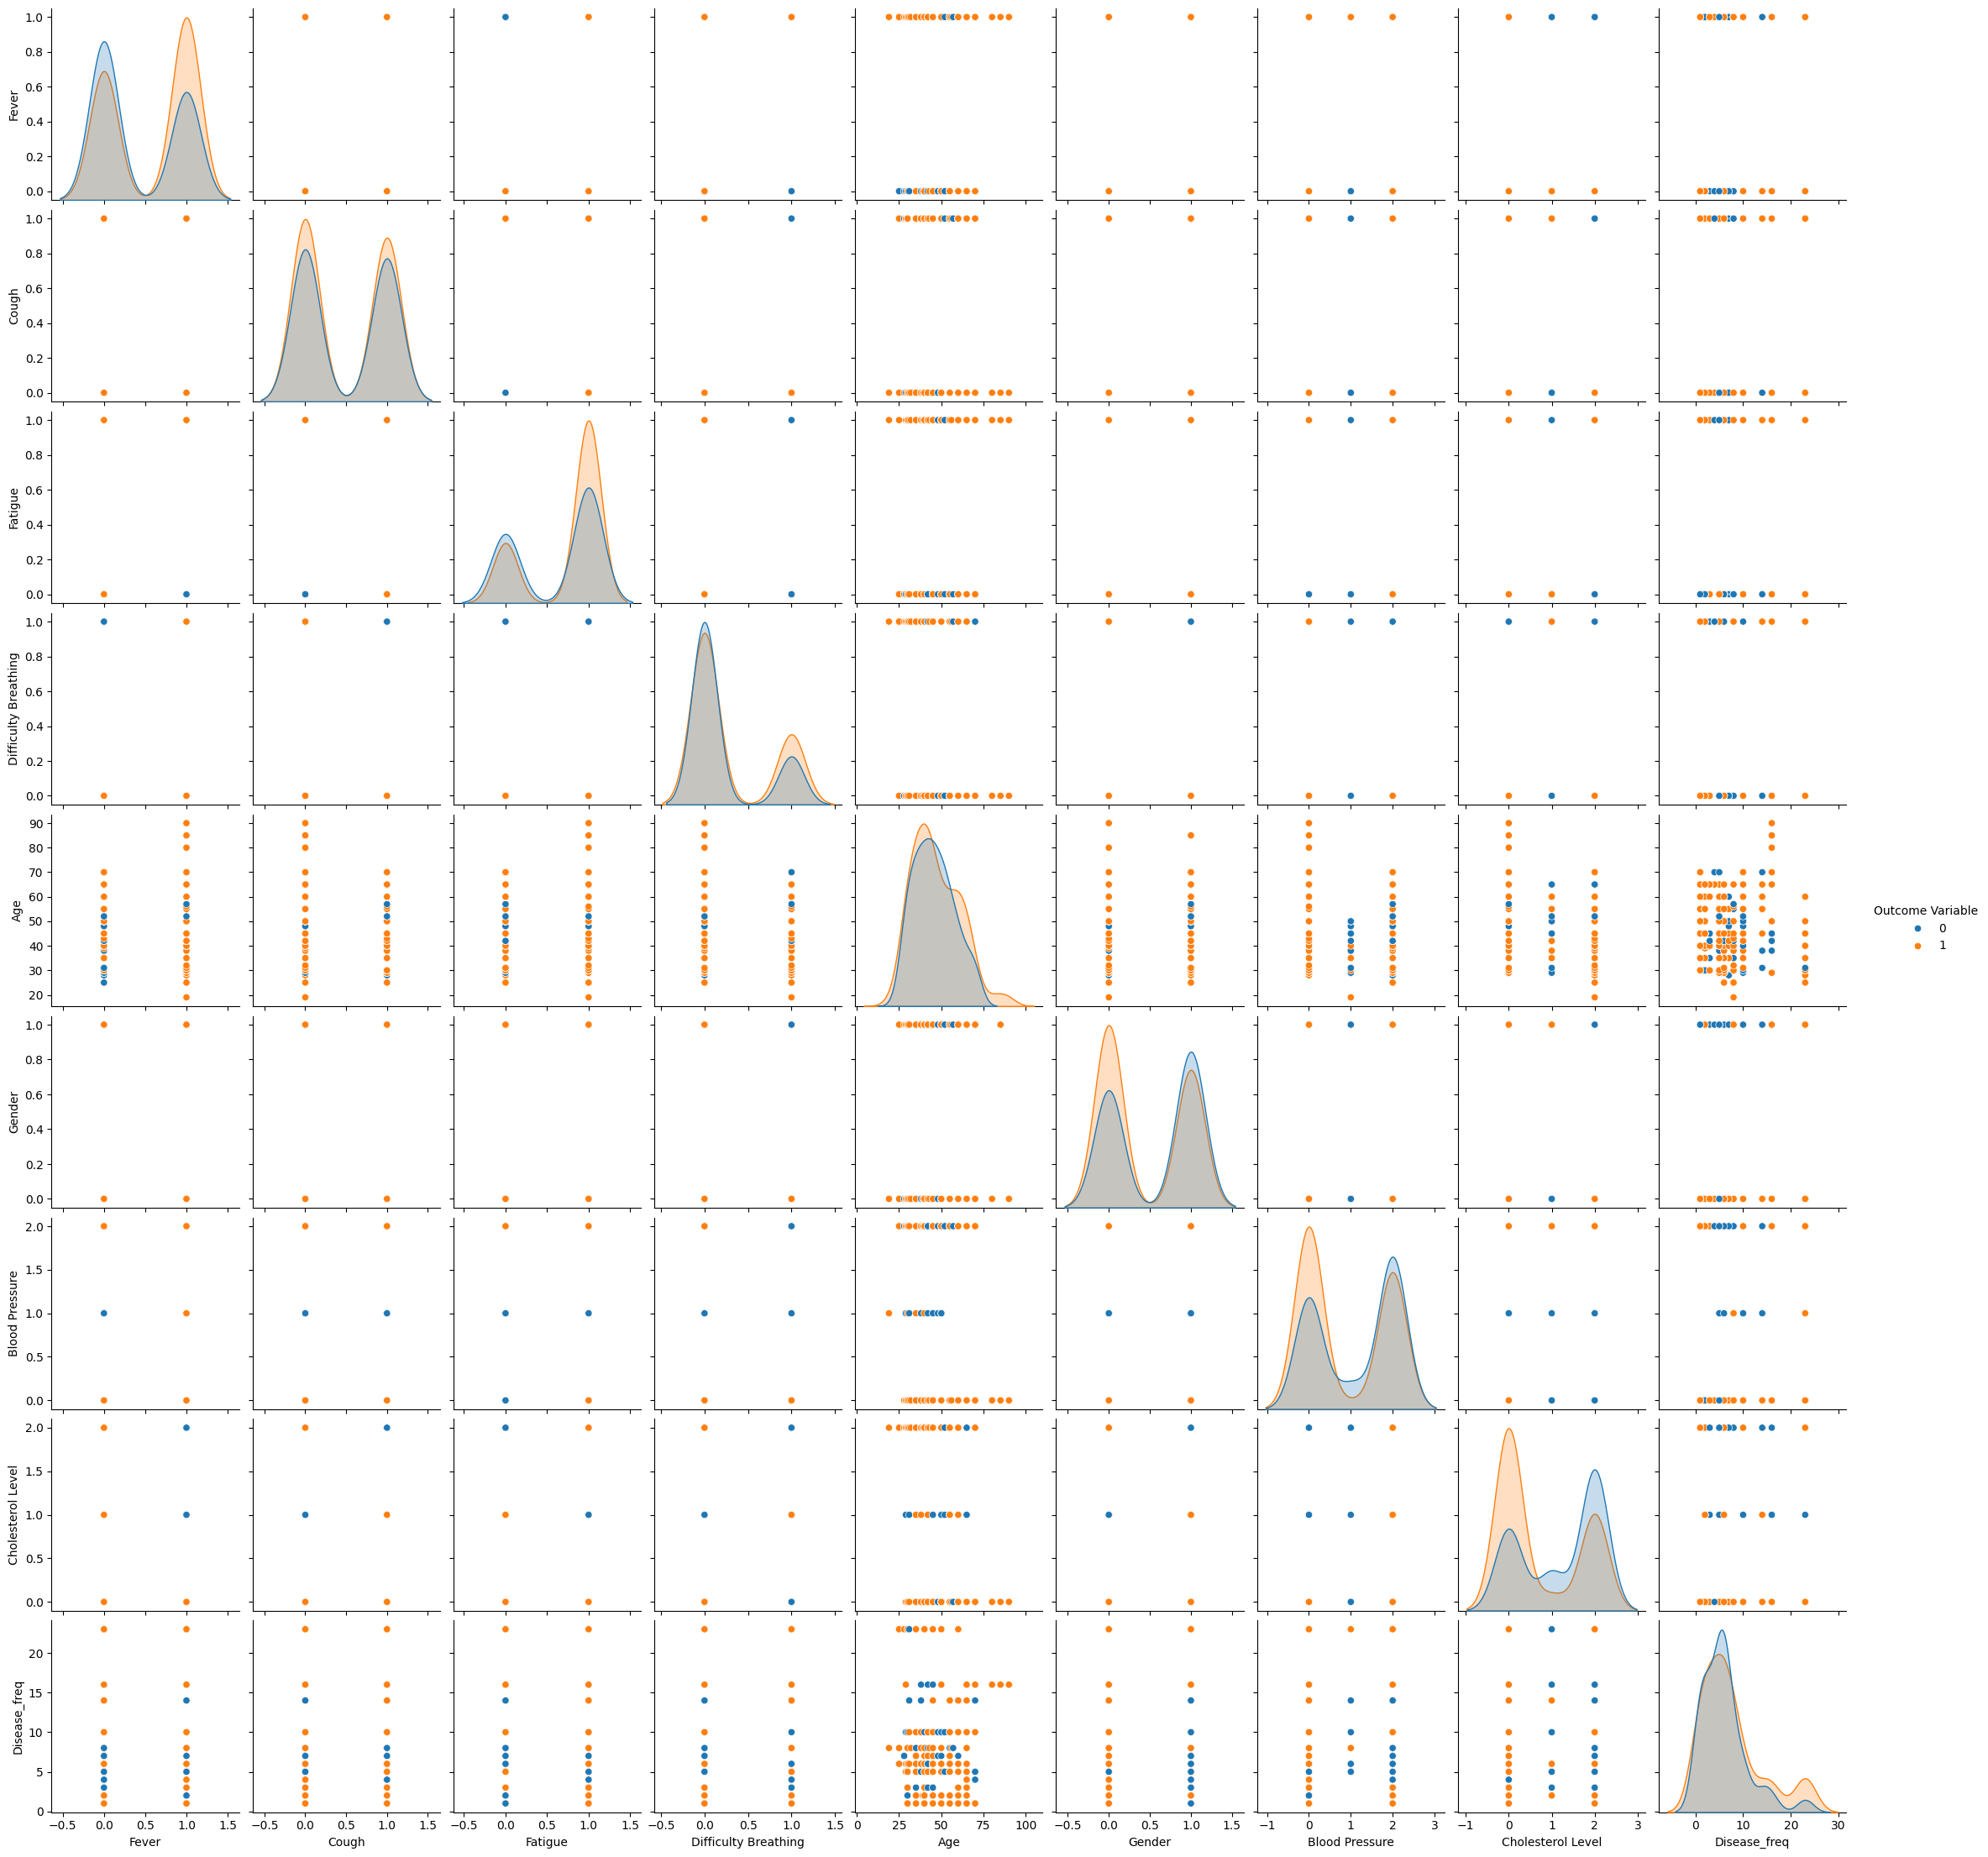

In [ ]:
sns.pairplot(df,hue='Outcome Variable')
plt.show()

Text(0.5, 1.0, 'Gender vs Outcome Variable')

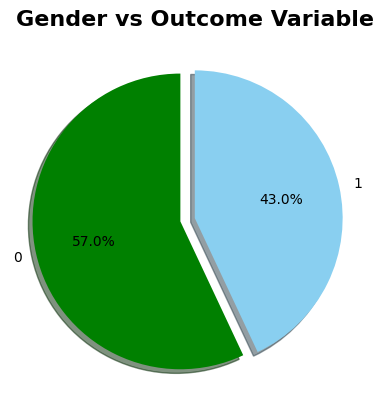

In [57]:
charges_by_Gender = df.groupby('Gender')['Outcome Variable'].sum()
explode = [0.1, 0]
colors = ['green', '#89cff0']
plt.pie(charges_by_Gender, labels=charges_by_Gender.index, autopct='%1.1f%%',colors=colors,explode=explode, shadow=True, startangle=90)
plt.title('Gender vs Outcome Variable',fontsize=16, fontweight='bold')
#0 - Female 1-Male

Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

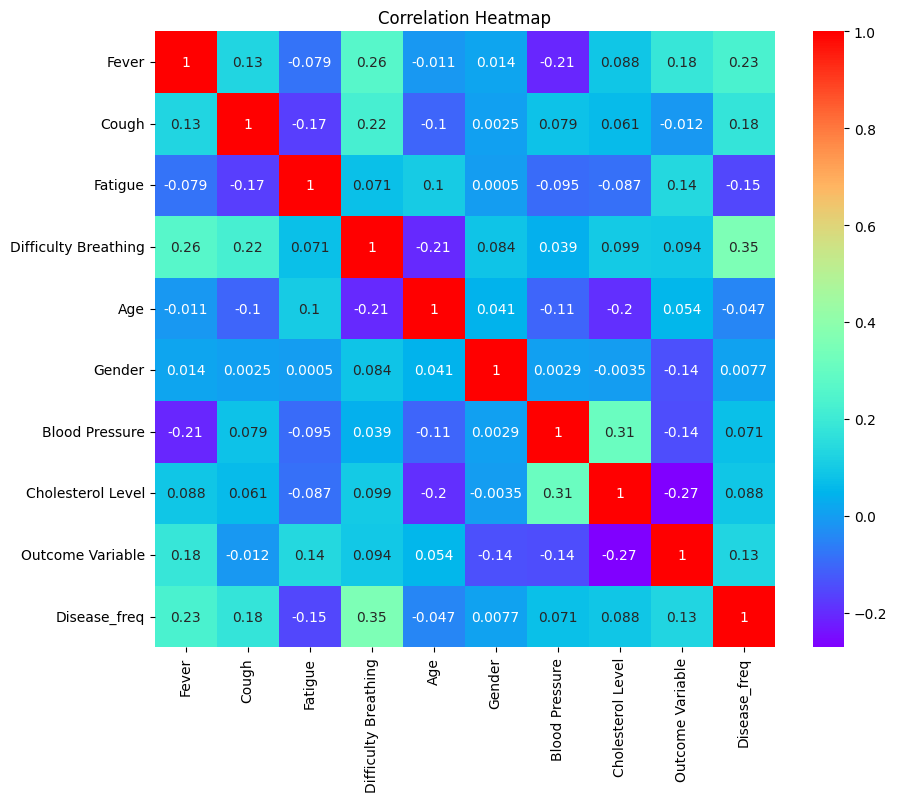

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

**Train & Test Split**

In [ ]:
X = df.drop(columns='Outcome Variable',axis=1)
X

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq
0,1,0,1,1,19,0,1,2,8
1,0,1,1,0,25,0,2,2,6
2,0,1,1,0,25,0,2,2,6
3,1,1,0,1,25,1,2,2,23
4,1,1,0,1,25,1,2,2,23
...,...,...,...,...,...,...,...,...,...
344,1,0,1,0,80,0,0,0,16
345,1,0,1,0,85,1,0,0,16
346,1,0,1,0,85,1,0,0,16
347,1,0,1,0,90,0,0,0,16


In [ ]:
y = df[['Outcome Variable']]
y

,Outcome Variable
0,1
1,0
2,0
3,1
4,1
...,...
344,1
345,1
346,1
347,1


In [ ]:
X.ndim

2

In [ ]:
y.ndim

2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_train_1d = np.ravel(y_train)

In [ ]:
y_train_1d.ndim

1

**RandomForest & Bayesian**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RNF = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from hyperopt import fmin,Trials,tpe,hp,STATUS_OK

In [ ]:
Space = {
    'n_estimators' : hp. quniform('n_estimators',50,500,50),
    'criterion' : hp.choice('criterion',['gini', 'entropy', 'log_loss']),
    'max_depth' : hp.quniform('max_depth',1,10,1),
    'max_features' : hp.choice('max_features',['sqrt', 'log2', None])
}

In [ ]:
def Bayesian(Space):
  RNF = RandomForestClassifier(
      n_estimators = int(Space['n_estimators']),
      criterion = Space['criterion'],
      max_depth = int(Space['max_depth']),
      max_features = Space['max_features']
  )
  accuracy = cross_val_score(RNF,X_train,y_train_1d,cv=5).mean()
  return{'loss':-accuracy,'status':STATUS_OK}

In [ ]:
trials = Trials()

In [ ]:
Best = fmin(fn=Bayesian,space=Space,algo=tpe.suggest,max_evals = 200,trials=trials)

100%|██████████| 200/200 [06:30<00:00,  1.95s/trial, best loss: -0.8207142857142857]


In [ ]:
Best

{'criterion': 1, 'max_depth': 10.0, 'max_features': 0, 'n_estimators': 100.0}

In [ ]:
RNF = RandomForestClassifier(
      n_estimators = 400,
      criterion = 'log_loss',
      max_depth = 9,
      max_features = 'sqrt'
  )

In [ ]:
RNF.fit(X_train,y_train_1d)

RandomForestClassifier(criterion='log_loss', max_depth=9, n_estimators=400)

In [ ]:
y_hat = RNF.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_test,y_hat))

0.8571428571428571


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.89      0.85      0.87        40

    accuracy                           0.86        70
   macro avg       0.85      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



In [ ]:
print(confusion_matrix(y_test,y_hat))

[[26  4]
 [ 6 34]]


In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("/content/drive/MyDrive/Disease_symptom_and_patient_profile_dataset.csv")


disease_label_encoder = LabelEncoder()
data['Disease'] = disease_label_encoder.fit_transform(data['Disease'])


label_encoder = LabelEncoder()


for column in data.columns:
    if data[column].dtype == 'object' and column != 'Disease':
        data[column] = label_encoder.fit_transform(data[column])


X = data.drop(columns=['Disease'])
y = data['Disease']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

def get_user_input():

    features = {}

    features['Fever'] = input("Enter Fever (Yes/No): ")
    features['Cough'] = input("Enter Cough (Yes/No): ")
    features['Fatigue'] = input("Enter Fatigue (Yes/No): ")
    features['Difficulty Breathing'] = input("Enter Difficulty Breathing (Yes/No): ")
    features['Age'] = int(input("Enter Age: "))
    features['Gender'] = input("Enter Gender (Male/Female): ")
    features['Blood Pressure'] = input("Enter Blood Pressure (Low/Normal/High): ")
    features['Cholesterol Level'] = input("Enter Cholesterol Level (Low/Normal/High): ")

    return features

def predict_disease(model):

    features = get_user_input()

    user_df = pd.DataFrame([features])

    for column in user_df.columns:
        if user_df[column].dtype == 'object':
            unique_values = list(data[column].unique()) + list(user_df[column].unique())
            label_encoder.fit(unique_values)
            user_df[column] = label_encoder.transform(user_df[column])


    missing_cols = set(X.columns) - set(user_df.columns)
    for col in missing_cols:
        user_df[col] = 0


    user_df = user_df[X.columns]


    prediction = model.predict(user_df)
    prediction_proba = model.predict_proba(user_df)


    predicted_disease = prediction[0]
    predicted_probability = prediction_proba[0].max()

    predicted_disease_str = disease_label_encoder.inverse_transform([predicted_disease])[0]

    return predicted_disease_str, predicted_probability


predicted_disease_str, prediction_value = predict_disease(rf_model)
print(f"The predicted disease is: {predicted_disease_str} with a probability of {prediction_value:.2f}")

Enter Fever (Yes/No): yes
Enter Cough (Yes/No): yes
Enter Fatigue (Yes/No): yes
Enter Difficulty Breathing (Yes/No): no
Enter Age: 25
Enter Gender (Male/Female): male
Enter Blood Pressure (Low/Normal/High): normal
Enter Cholesterol Level (Low/Normal/High): high
The predicted disease is: Chronic Obstructive Pulmonary... with a probability of 0.26


In [ ]:
import pickle
file_path = '/content/drive/MyDrive/rf_model.pkl'
with open(file_path, 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print(f"Model saved as {file_path}")